In [1]:
import matplotlib
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
cities = pd.read_excel('../附件1.xlsx', '城市疫情')
district = pd.read_excel('../附件1.xlsx', '城市省份对照表')
# inter = pd.read_excel('../附件1.xlsx', '国际疫情')
a = pd.read_excel('../附件1.xlsx', 'A市涉疫场所分布')

# task 1.1

In [3]:
def fill(x, a):
    if str(x['日期'].max())[6:10] != '6-30':
        x = x.append(a)
    x.index = x['日期'].drop_duplicates()
    x = x.resample('D').asfreq()
    x = x.drop(columns='日期')
    x = x.drop(columns='城市')
    x = x.fillna(0)
    return x
temp = pd.DataFrame([pd.Timestamp('2020-06-30'), 'o', 0, 0, 0], index=list(cities.columns)).T
cities = cities.groupby('城市').apply(fill, temp).reset_index()
cities['新增确诊'] = cities['新增确诊'].astype('int')
cities['新增治愈'] = cities['新增治愈'].astype('int')
cities['新增死亡'] = cities['新增死亡'].astype('int')
cities

,城市,日期,新增确诊,新增治愈,新增死亡
0,七台河,2020-01-26,1,0,0
1,七台河,2020-01-27,1,0,0
2,七台河,2020-01-28,0,0,0
3,七台河,2020-01-29,0,0,0
4,七台河,2020-01-30,1,0,0
...,...,...,...,...,...
68573,龙岩,2020-06-26,0,0,0
68574,龙岩,2020-06-27,0,0,0
68575,龙岩,2020-06-28,0,0,0
68576,龙岩,2020-06-29,0,0,0


In [4]:
cities = pd.concat([cities, cities.groupby('城市').cumsum()], axis=1)
cities.columns = ['城市', '日期', '新增确诊', '新增治愈', '新增死亡', '累计确诊', '累计治愈', '累计死亡']
order = ['城市', '日期', '累计确诊', '累计治愈', '累计死亡']
cusum = cities[order]
cusum.to_csv('../result/result1/task1_1.csv', index=False)
cusum

,城市,日期,累计确诊,累计治愈,累计死亡
0,七台河,2020-01-26,1,0,0
1,七台河,2020-01-27,2,0,0
2,七台河,2020-01-28,2,0,0
3,七台河,2020-01-29,2,0,0
4,七台河,2020-01-30,3,0,0
...,...,...,...,...,...
68573,龙岩,2020-06-26,6,6,0
68574,龙岩,2020-06-27,6,6,0
68575,龙岩,2020-06-28,6,6,0
68576,龙岩,2020-06-29,6,6,0


In [5]:
c = set(['武汉', '深圳', '保定'])
d = set([10, 15])
cusum['day'] = cusum['日期'].apply(lambda x:x.day)
cusum['day'] = cusum['day'].apply(lambda x:True if x in d else False)
temp = cusum[cusum['城市'].isin(c) & cusum['day']].drop(columns=['day']).reset_index(drop=True)
temp.to_csv('../result/result1/task1_1_temp.csv')
temp

<ipython-input-5-10cdcc3624b4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cusum['day'] = cusum['日期'].apply(lambda x:x.day)
<ipython-input-5-10cdcc3624b4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cusum['day'] = cusum['day'].apply(lambda x:True if x in d else False)


,城市,日期,累计确诊,累计治愈,累计死亡
0,保定,2020-02-10,30,9,0
1,保定,2020-02-15,32,19,0
2,保定,2020-03-10,32,32,0
3,保定,2020-03-15,32,32,0
4,保定,2020-04-10,32,32,0
5,保定,2020-04-15,32,32,0
6,保定,2020-05-10,32,32,0
7,保定,2020-05-15,32,32,0
8,保定,2020-06-10,32,32,0
9,保定,2020-06-15,36,32,0


# task 1.2

In [6]:
d = {}
for i,v in district.values:
    d[i] = v
cities['省份'] = cities['城市'].apply(lambda x:d[x])
cities

,城市,日期,新增确诊,新增治愈,新增死亡,累计确诊,累计治愈,累计死亡,省份
0,七台河,2020-01-26,1,0,0,1,0,0,黑龙江
1,七台河,2020-01-27,1,0,0,2,0,0,黑龙江
2,七台河,2020-01-28,0,0,0,2,0,0,黑龙江
3,七台河,2020-01-29,0,0,0,2,0,0,黑龙江
4,七台河,2020-01-30,1,0,0,3,0,0,黑龙江
...,...,...,...,...,...,...,...,...,...
68573,龙岩,2020-06-26,0,0,0,6,6,0,福建
68574,龙岩,2020-06-27,0,0,0,6,6,0,福建
68575,龙岩,2020-06-28,0,0,0,6,6,0,福建
68576,龙岩,2020-06-29,0,0,0,6,6,0,福建


In [7]:
order = ['省份', '日期', '新增确诊', '新增治愈', '新增死亡']
provinces = cities[order]
provinces = pd.concat([provinces, provinces.groupby('省份').cumsum()], axis=1)
provinces.columns = ['省份', '日期', '新增确诊人数', '新增治愈人数', '新增死亡人数', '累计确诊人数', '累计治愈人数', '累计死亡人数']
provinces

,省份,日期,新增确诊人数,新增治愈人数,新增死亡人数,累计确诊人数,累计治愈人数,累计死亡人数
0,黑龙江,2020-01-26,1,0,0,1,0,0
1,黑龙江,2020-01-27,1,0,0,2,0,0
2,黑龙江,2020-01-28,0,0,0,2,0,0
3,黑龙江,2020-01-29,0,0,0,2,0,0
4,黑龙江,2020-01-30,1,0,0,3,0,0
...,...,...,...,...,...,...,...,...
68573,福建,2020-06-26,0,0,0,363,357,1
68574,福建,2020-06-27,0,0,0,363,357,1
68575,福建,2020-06-28,0,0,0,363,357,1
68576,福建,2020-06-29,0,0,0,363,357,1


In [8]:
provinces[['省份', '日期']].duplicated().sum()

63083

In [9]:
provinces = provinces.groupby(['省份', '日期']).sum().reset_index()
provinces.to_csv('../result/result1/task1_2.csv', index=False)
provinces

,省份,日期,新增确诊人数,新增治愈人数,新增死亡人数,累计确诊人数,累计治愈人数,累计死亡人数
0,上海,2020-01-20,1,0,0,381,348,0
1,上海,2020-01-21,0,0,0,381,348,0
2,上海,2020-01-22,0,0,0,381,348,0
3,上海,2020-01-23,0,0,0,381,348,0
4,上海,2020-01-24,0,1,0,381,349,0
...,...,...,...,...,...,...,...,...
5490,黑龙江,2020-06-26,0,0,0,5450,5344,106
5491,黑龙江,2020-06-27,0,0,0,5450,5344,106
5492,黑龙江,2020-06-28,0,0,0,5450,5344,106
5493,黑龙江,2020-06-29,0,0,0,5450,5344,106


In [10]:
c = set(['湖北', '广东', '河北'])
provinces['day'] = provinces['日期'].apply(lambda x:x.day)
provinces['day'] = provinces['day'].apply(lambda x:True if x==15 else False)
temp = provinces[provinces['省份'].isin(c) & provinces['day']].drop(columns=['day']).reset_index(drop=True)
temp.to_csv('../result/result1/task1_2_temp.csv')
temp

,省份,日期,新增确诊人数,新增治愈人数,新增死亡人数,累计确诊人数,累计治愈人数,累计死亡人数
0,广东,2020-02-15,22,50,0,22052,17405,68
1,广东,2020-03-15,4,5,0,22352,18505,75
2,广东,2020-04-15,5,0,0,22562,18605,75
3,广东,2020-05-15,0,0,0,22580,18605,75
4,广东,2020-06-15,3,0,0,22619,18607,75
5,河北,2020-02-15,9,14,0,2381,2100,31
6,河北,2020-03-15,0,0,0,2399,2310,34
7,河北,2020-04-15,1,1,0,2646,2540,38
8,河北,2020-05-15,0,0,0,2646,2545,38
9,河北,2020-06-15,4,0,0,2650,2546,38


# task 1.3

In [11]:
provinces['住院人数'] = provinces['累计确诊人数'] - provinces['新增治愈人数'] - provinces['新增死亡人数']
order = ['省份', '日期', '住院人数']
temp = provinces[order]
temp.to_csv('../result/result1/task1_3.csv', index=False)
temp

,省份,日期,住院人数
0,上海,2020-01-20,381
1,上海,2020-01-21,381
2,上海,2020-01-22,381
3,上海,2020-01-23,381
4,上海,2020-01-24,380
...,...,...,...
5490,黑龙江,2020-06-26,5450
5491,黑龙江,2020-06-27,5450
5492,黑龙江,2020-06-28,5450
5493,黑龙江,2020-06-29,5450


In [12]:
c = ['湖北', '广东', '上海']
provinces['day'] = provinces['日期'].apply(lambda x:x.day)
provinces['day'] = provinces['day'].apply(lambda x:True if x==20 else False)
temp = provinces[provinces['省份'].isin(c) & provinces['day']].drop(columns=['day']).reset_index(drop=True)
temp.to_csv('../result/result1/task1_3_temp.csv')
temp

,省份,日期,新增确诊人数,新增治愈人数,新增死亡人数,累计确诊人数,累计治愈人数,累计死亡人数,住院人数
0,上海,2020-01-20,1,0,0,381,348,0,381
1,上海,2020-02-20,1,13,0,10083,9250,16,10070
2,上海,2020-03-20,9,0,0,10129,9376,16,10129
3,上海,2020-04-20,0,9,0,10387,9574,16,10378
4,上海,2020-05-20,1,3,0,10416,9688,16,10413
5,上海,2020-06-20,0,0,0,10447,9711,16,10447
6,广东,2020-01-20,13,0,0,4837,3928,14,4837
7,广东,2020-02-20,1,45,0,22069,17634,71,22024
8,广东,2020-03-20,7,3,0,22390,18515,75,22387
9,广东,2020-04-20,1,0,0,22573,18605,75,22573


# task 1.4

In [13]:
a.columns = ['疫情场所', '通报日期', 'x', 'y']
a['w'] = 1
a

,疫情场所,通报日期,x,y,w
0,ID002,1,-2.30,3.90,1
1,ID004,1,5.64,9.99,1
2,ID008,1,0.55,0.40,1
3,ID009,1,1.99,1.94,1
4,ID019,1,4.64,11.11,1
...,...,...,...,...,...
147,ID053,16,-11.37,3.34,1
148,ID018,17,-16.09,7.58,1
149,ID021,17,-8.34,-1.44,1
150,ID068,17,-16.58,6.44,1


C:\Users\IFEG8\.conda\envs\w\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


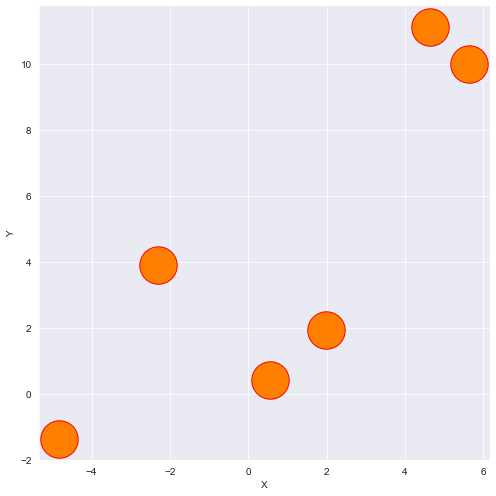

In [14]:
sb.set_style('darkgrid')#设置风格为暗，要不然看不出来

g=sb.FacetGrid(data=a[:6],col_order='class',size=7)#size为设置显示界面大小
g.map(plt.scatter,'x','y',s=1400,linewidth=1,edgecolor='red',color='#ff8000')#edgecolor为全边颜色，color为圈内颜色
g.set_axis_labels('X','Y')#设置标题
plt.savefig('../result/result1/task1_4_1.svg')
plt.show()

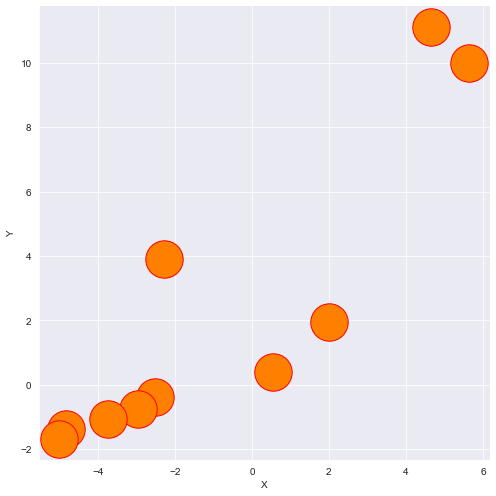

In [15]:
sb.set_style('darkgrid')#设置风格为暗，要不然看不出来

g=sb.FacetGrid(data=a[:10],col_order='class',size=7)#size为设置显示界面大小
g.map(plt.scatter,'x','y',s=1400,linewidth=1,edgecolor='red',color='#ff8000')#edgecolor为全边颜色，color为圈内颜色
g.set_axis_labels('X','Y')#设置标题
plt.savefig('../result/result1/task1_4_2.svg')
plt.show()